In [1]:
from libdatasets import *
import librun
import libstop
from importlib import reload
from libadversarial import uncertainty_stop
from libstop import rank_stop_conds
from dotenv import load_dotenv; load_dotenv();

# Base

In [21]:
matrix = {
    # Dataset fetchers should cache if possible
    # Lambda wrapper required for function to be pickleable (sent to other threads via joblib)
    "datasets": [
        ("anuran", wrap(anuran, None)),
        ("avila", wrap(avila, None)),
        ("covertype", wrap(covertype, None)),
        ("rcv1", wrap(rcv1, None)),
        ("sensorless", wrap(sensorless, None)),
        ("spamassassin", wrap(spamassassin, None)),
        ("splice", wrap(splice, None)),
        ("swarm", wrap(swarm, None)),
        ("smartphone", wrap(smartphone, None))
    ],
    "dataset_mutators": {
        "none": (lambda *x, **kwargs: x),
    },
    "methods": [
        ("uncertainty", partial(uncertainty_stop, n_instances=10)),
    ],
    "models": [
        "svm-linear"
    ],
    "meta": {
        "dataset_size": 1000,
        "labelled_size": 10,
        "test_size": 0.5,
        "n_runs": 10,
        "ret_classifiers": True,
        "ensure_y": True,
        "stop_info": True,
        "aggregate": False,
        "stop_function": ("len1000", lambda learner: learner.y_training.shape[0] >= 1000),
        "pool_subsample": 1000
    }
}

In [22]:
results = librun.run(matrix, force_cache=True, fragment_run_start=0, fragment_run_end=1)
results_plots = [result[0] for result in results]
classifiers = [result[1] for result in results]
classifiers = [clf for clf in classifiers]

Experiment:   0%|          | 0/9 [00:00<?, ?it/s]

In [23]:
stop_conditions, stop_results = libstop.eval_stopping_conditions(results_plots, classifiers)

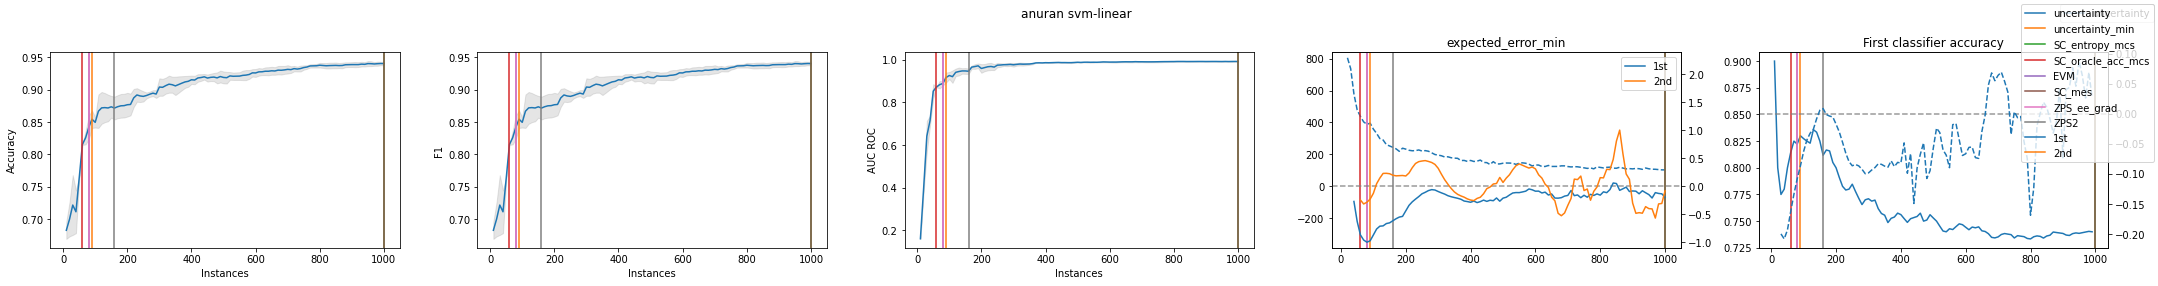

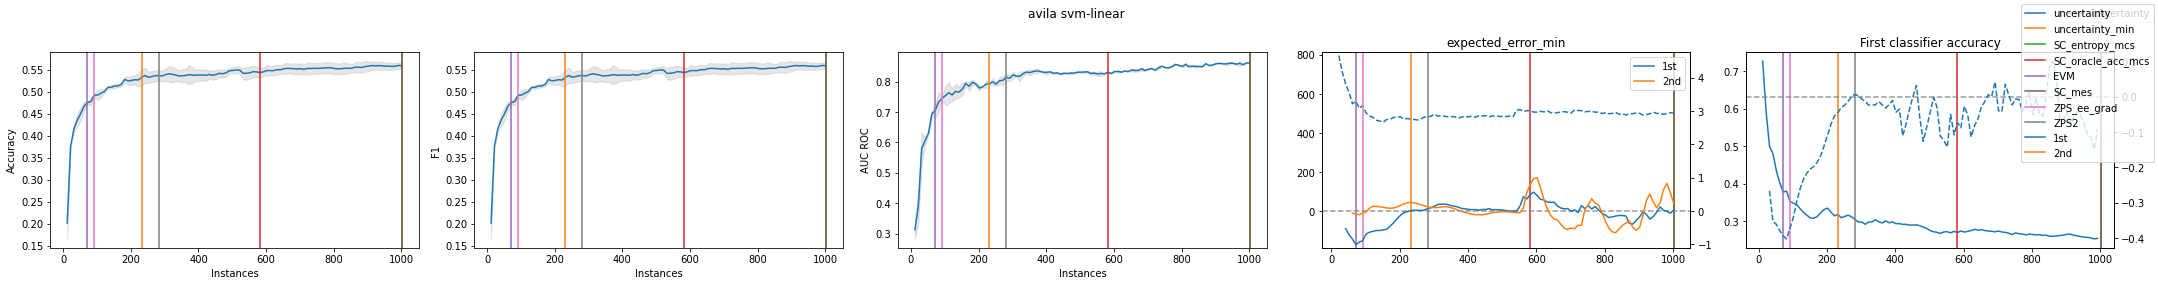

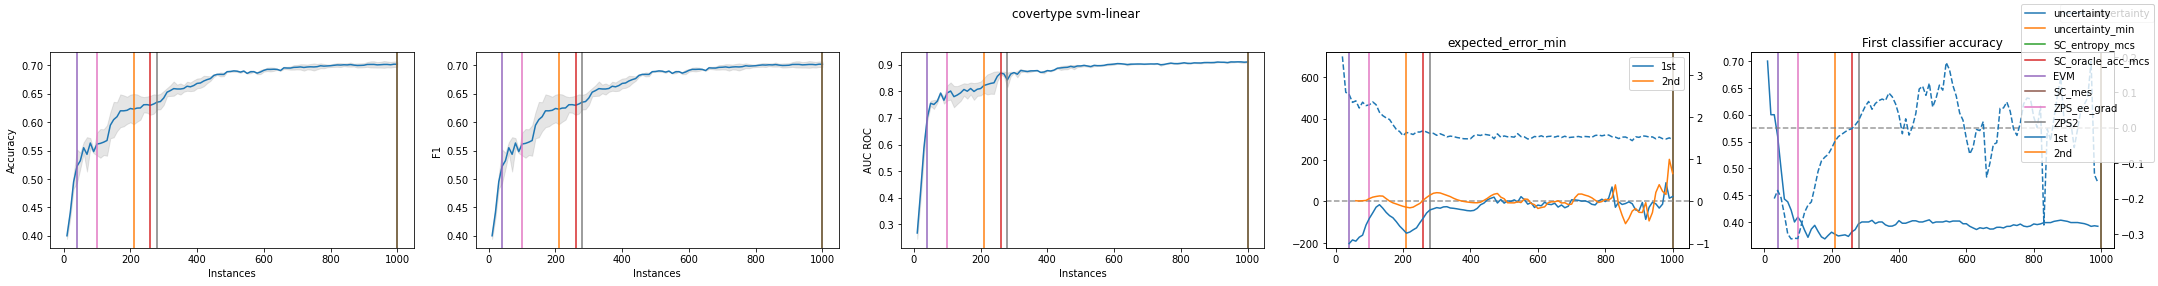

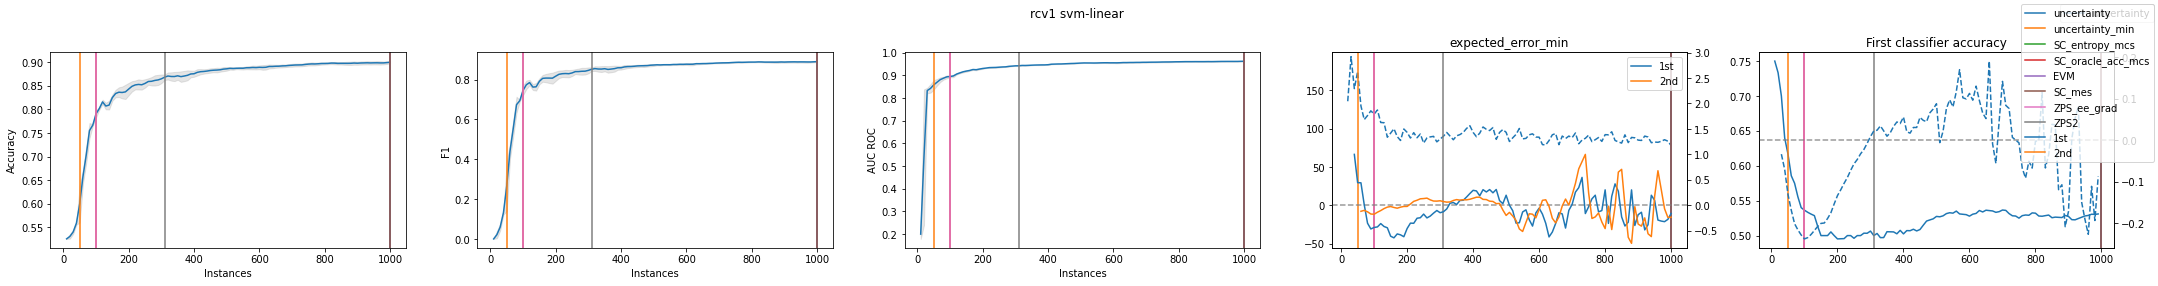

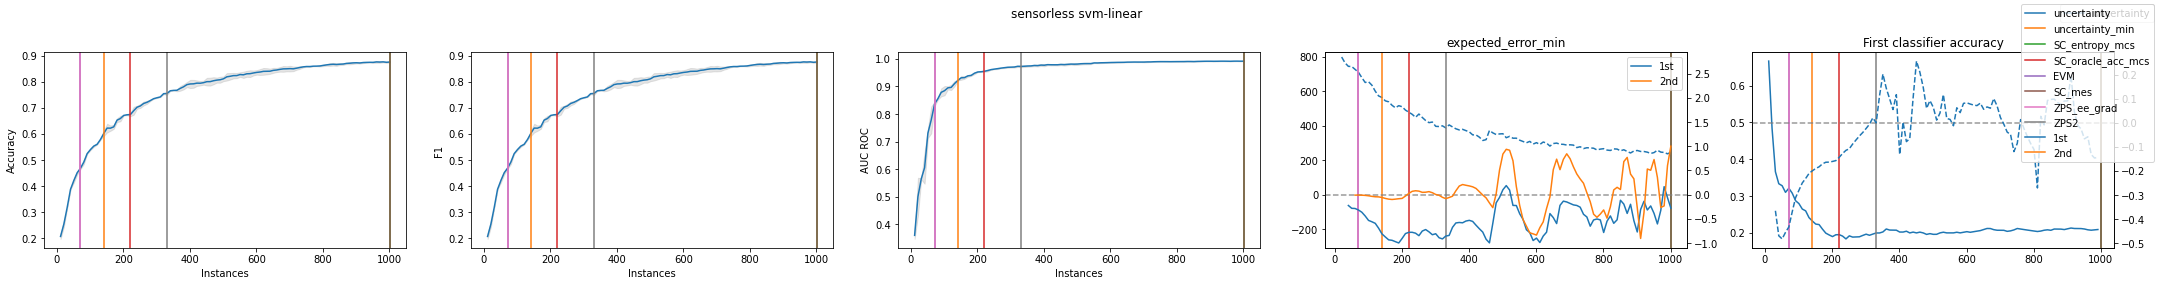

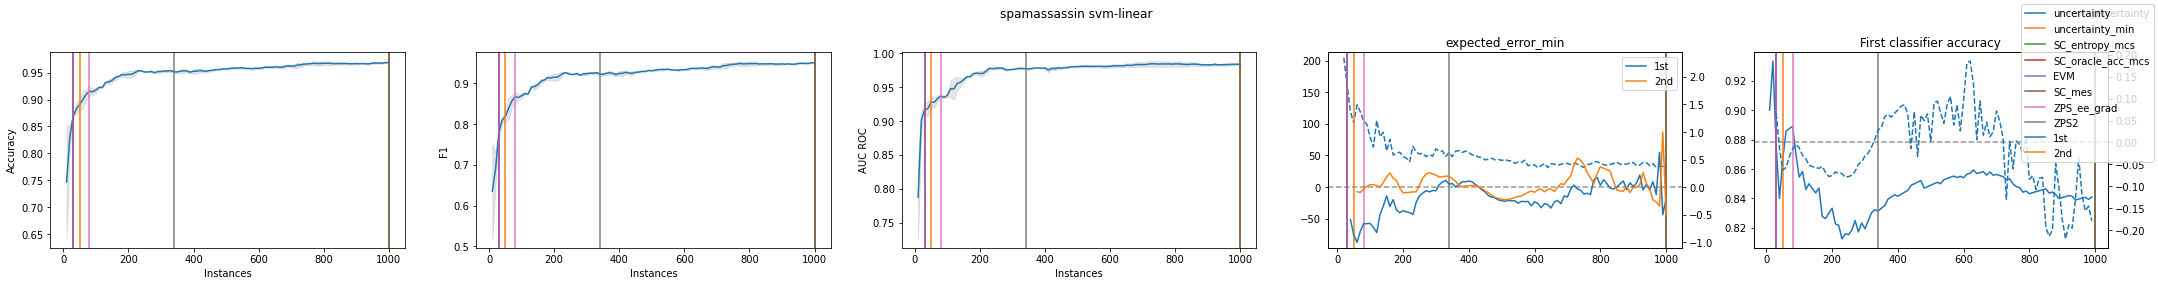

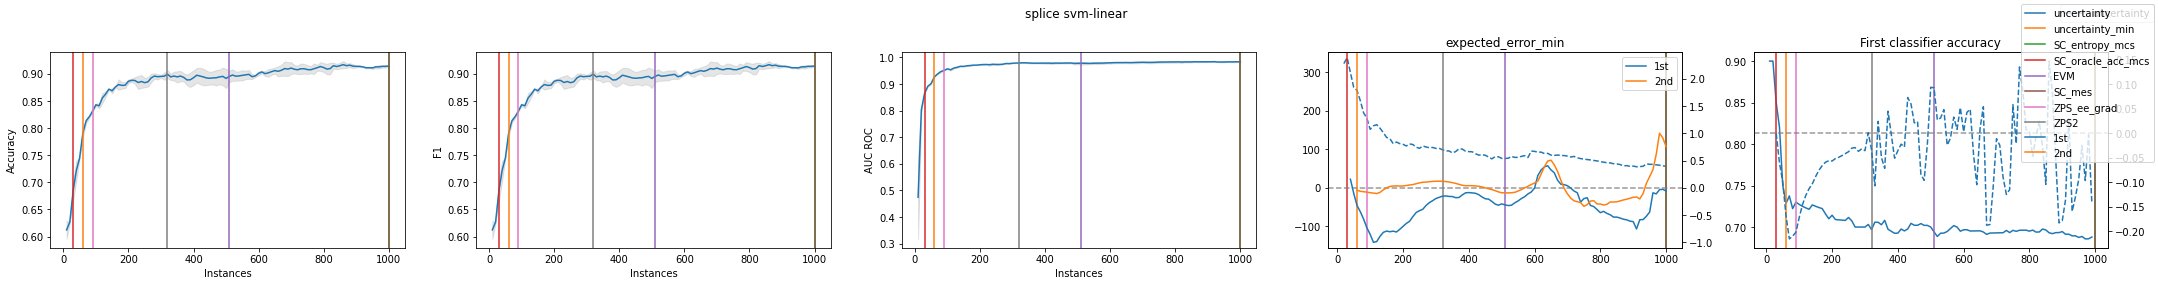

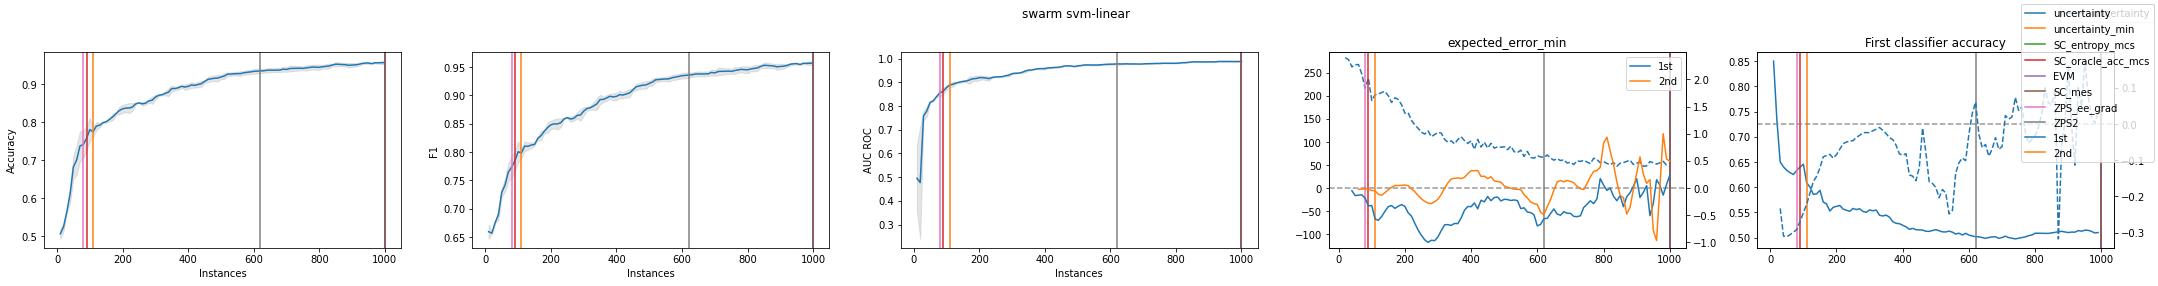

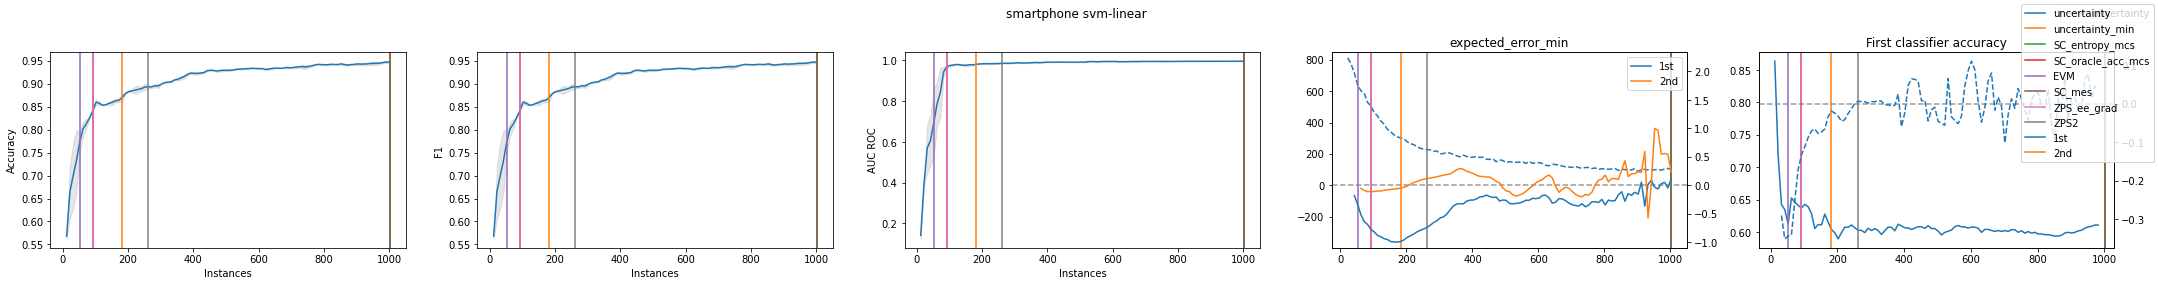

In [24]:
reload(librun)
librun.plot_stop(results_plots, classifiers, stop_conditions, stop_results, figsize=(30, 4), scale='linear') # scale='logit'

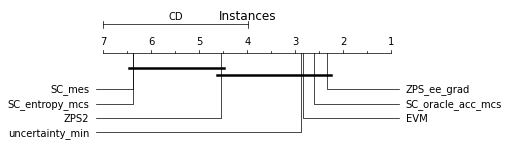

In [15]:
reload(libstop); from libstop import rank_stop_conds
rank_stop_conds(stop_results, results_plots, 'instances');

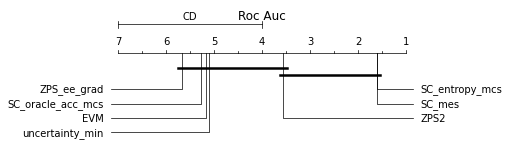

In [16]:
reload(libstop); from libstop import rank_stop_conds
rank_stop_conds(stop_results, results_plots, 'roc_auc_score');

# Noise (10%)

In [31]:
def noise():
    pass
matrix = {
    "datasets": [
        #("newsgroups", wrap(newsgroups, None)),
        ("rcv1", wrap(rcv1, None)),
        #("webkb", wrap(webkb, None)),
        ("spamassassin", wrap(spamassassin, None)),
        ("avila", wrap(avila, None)),
        #("smartphone", wrap(smartphone, None)),
        ("swarm", wrap(swarm, None)),
        ("sensorless", wrap(sensorless, None)),
        ("splice", wrap(splice, None)),
        ("anuran", wrap(anuran, None)),
        
    ],
    "dataset_mutators": {
        "noise10": partial(noise, amount=1e-1)
    },
    "methods": [
        ("uncertainty", partial(uncertainty_stop, n_instances=10)),
    ],
    "models": [
        "svm-linear"
    ],
    "meta": {
        "dataset_size": 1000,
        "labelled_size": 10,
        "test_size": 0.5,
        "n_runs": 10,
        "ret_classifiers": True,
        "ensure_y": True,
        "stop_info": True,
        "aggregate": False,
        "stop_function": ("len1000", lambda learner: learner.y_training.shape[0] >= 1000),
        "pool_subsample": 1000
    }
}


In [32]:
results = librun.run(matrix, force_cache=True, fragment_run_start=0, fragment_run_end=1)
results_plots = [result[0] for result in results]
classifiers = [result[1] for result in results]
classifiers = [clf for clf in classifiers]

Experiment:   0%|          | 0/7 [00:00<?, ?it/s]

In [33]:
stop_conditions, stop_results = libstop.eval_stopping_conditions(results_plots, classifiers)

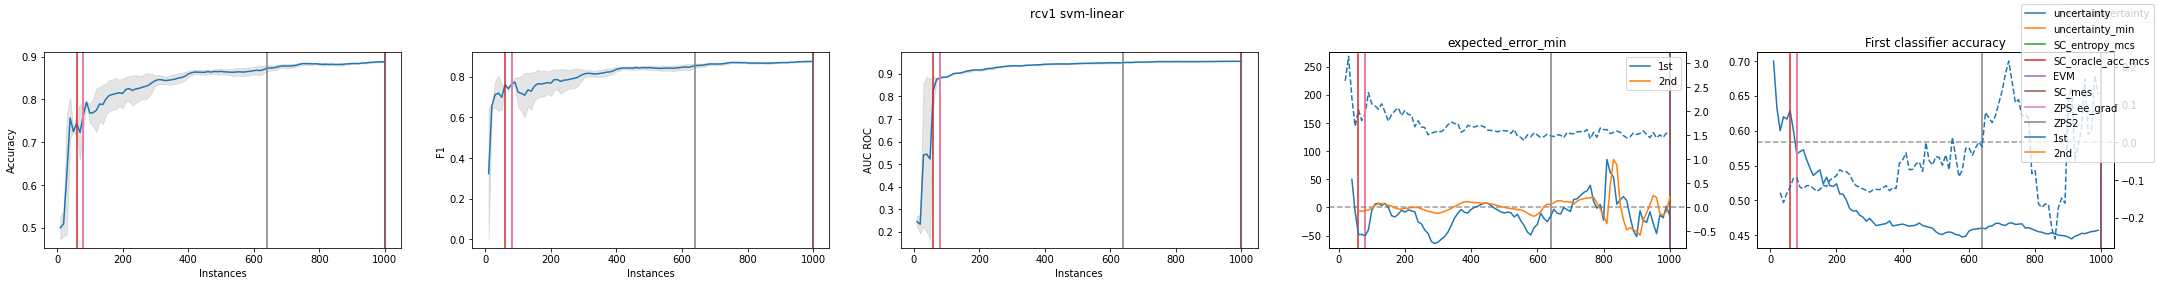

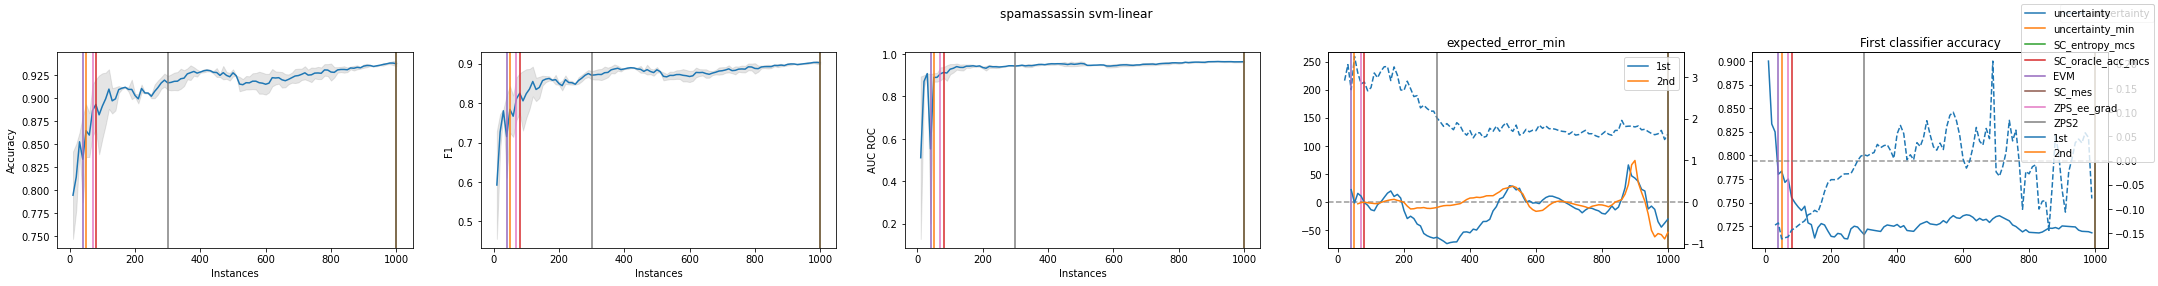

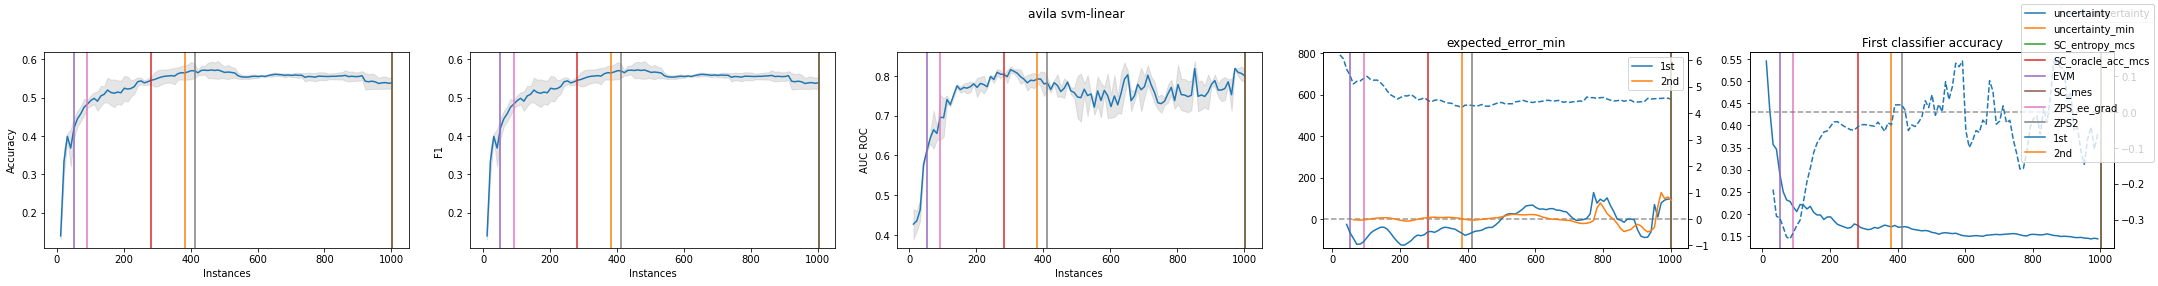

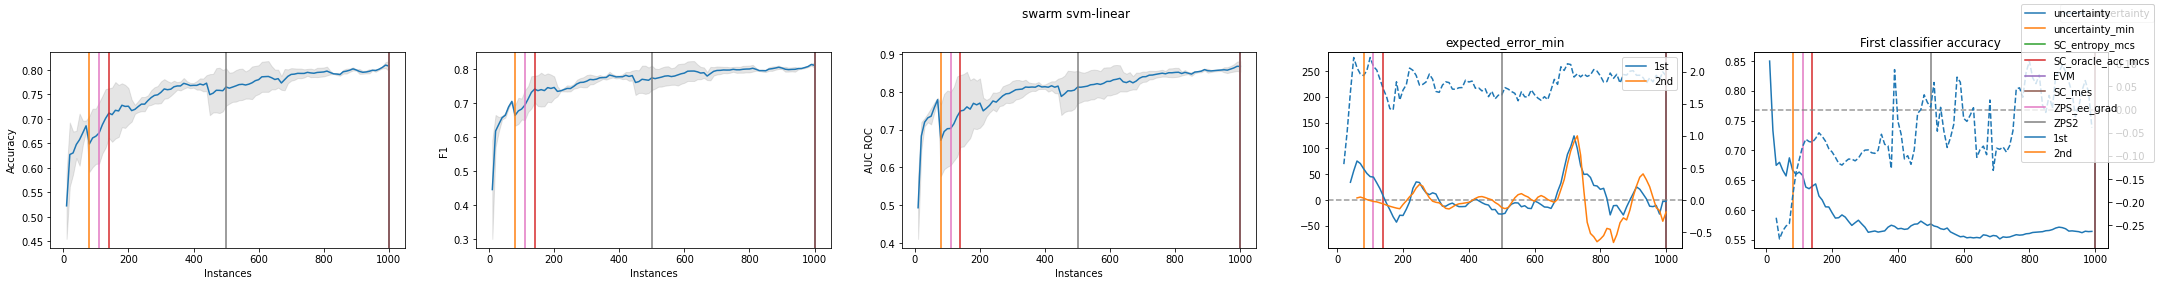

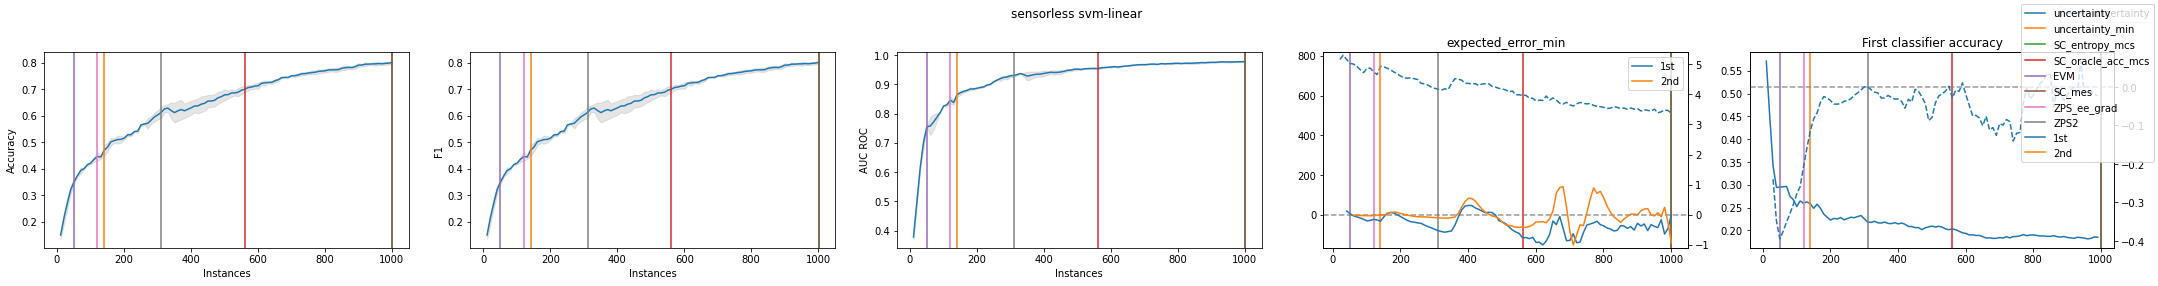

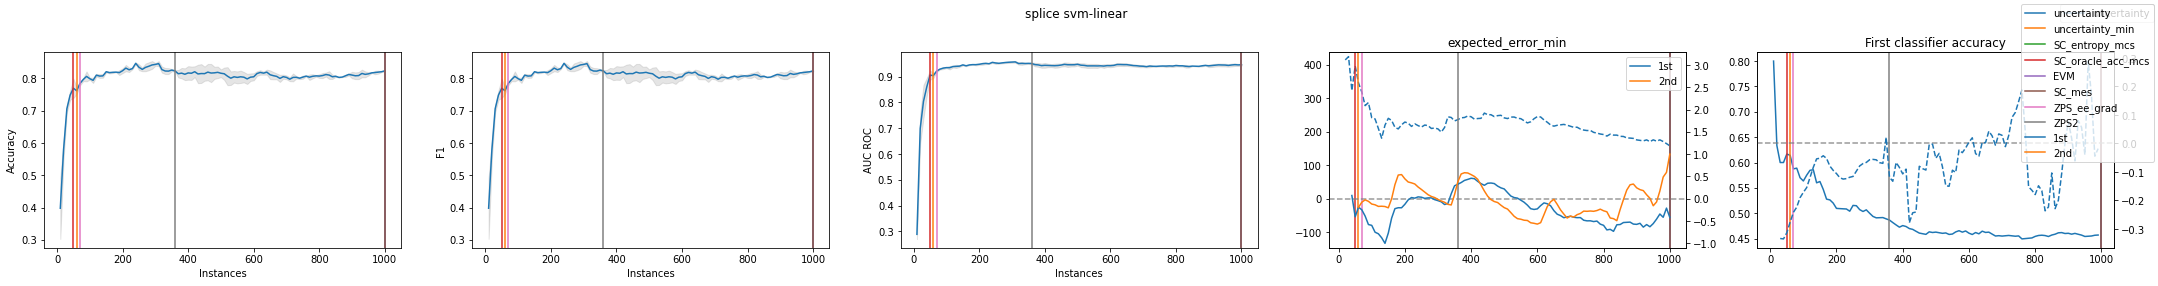

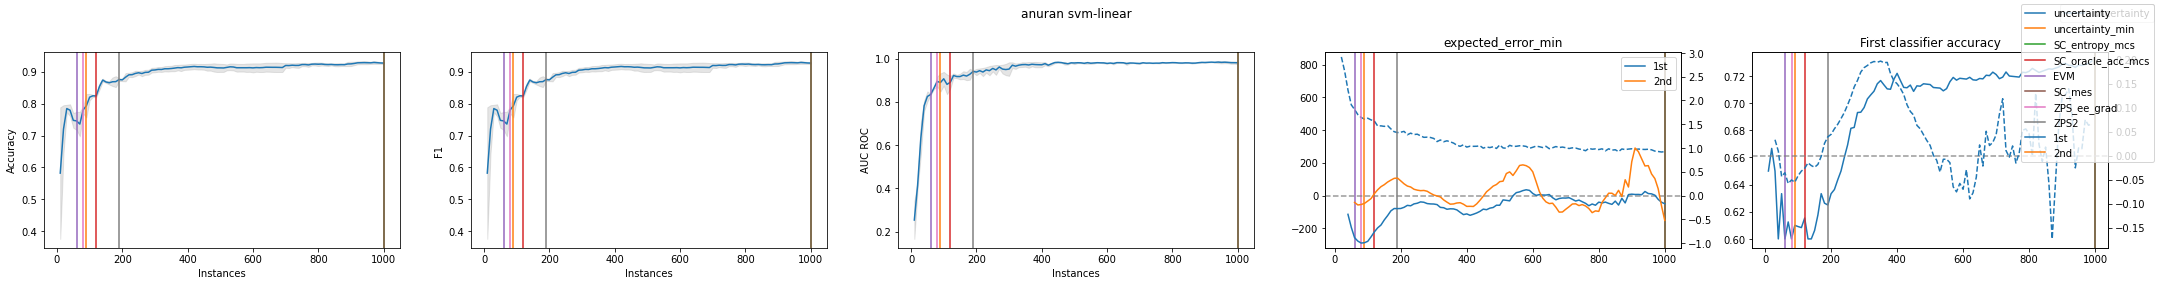

In [34]:
reload(librun)
librun.plot_stop(results_plots, classifiers, stop_conditions, stop_results, figsize=(30, 4))

# Noise (20%)

In [35]:
def noise():
    pass
matrix = {
    "datasets": [
        #("newsgroups", wrap(newsgroups, None)),
        ("rcv1", wrap(rcv1, None)),
        #("webkb", wrap(webkb, None)),
        ("spamassassin", wrap(spamassassin, None)),
        ("avila", wrap(avila, None)),
        #("smartphone", wrap(smartphone, None)),
        ("swarm", wrap(swarm, None)),
        ("sensorless", wrap(sensorless, None)),
        ("splice", wrap(splice, None)),
        ("anuran", wrap(anuran, None)),
        
    ],
    "dataset_mutators": {
        "noise10": partial(noise, amount=2e-1)
    },
    "methods": [
        ("uncertainty", partial(uncertainty_stop, n_instances=10)),
    ],
    "models": [
        "svm-linear"
    ],
    "meta": {
        "dataset_size": 1000,
        "labelled_size": 10,
        "test_size": 0.5,
        "n_runs": 10,
        "ret_classifiers": True,
        "ensure_y": True,
        "stop_info": True,
        "aggregate": False,
        "stop_function": ("len1000", lambda learner: learner.y_training.shape[0] >= 1000),
        "pool_subsample": 1000
    }
}


In [36]:
results = librun.run(matrix, force_cache=True, fragment_run_start=0, fragment_run_end=1)
results_plots = [result[0] for result in results]
classifiers = [result[1] for result in results]
classifiers = [clf for clf in classifiers]

Experiment:   0%|          | 0/7 [00:00<?, ?it/s]

In [37]:
stop_conditions, stop_results = libstop.eval_stopping_conditions(results_plots, classifiers)

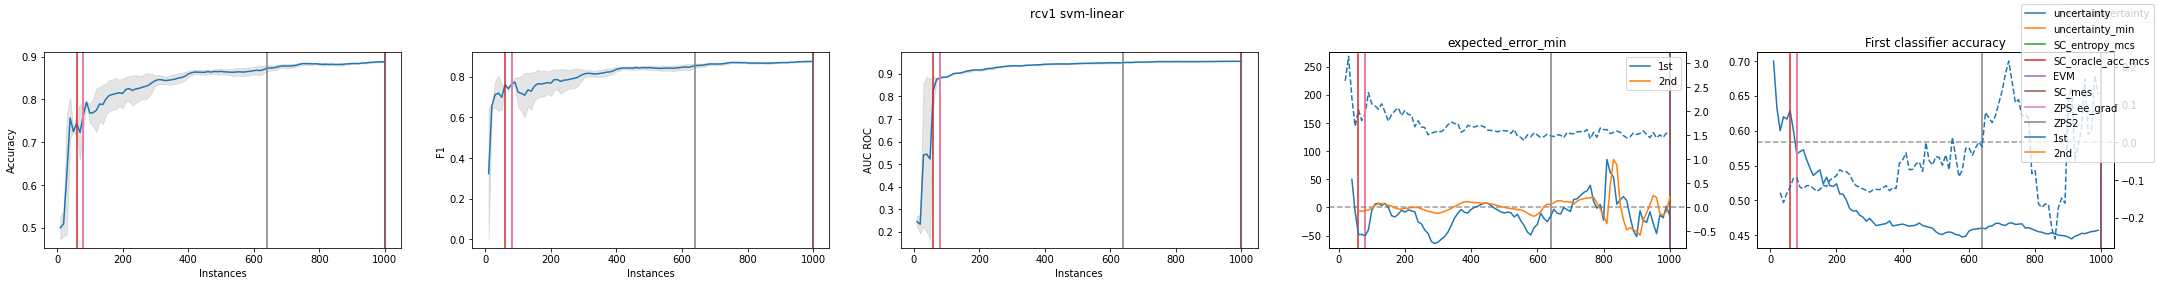

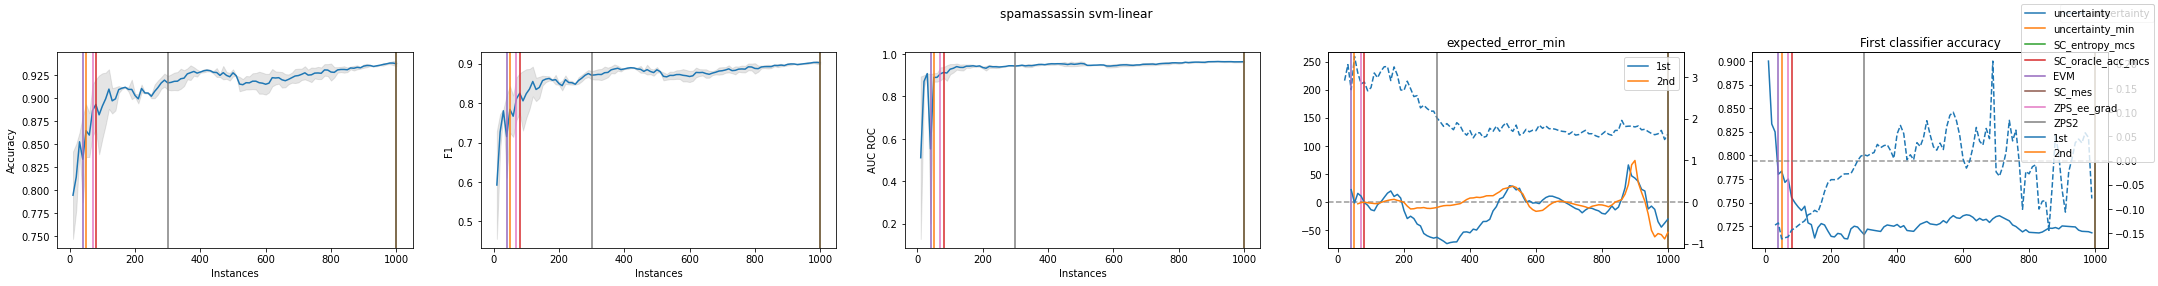

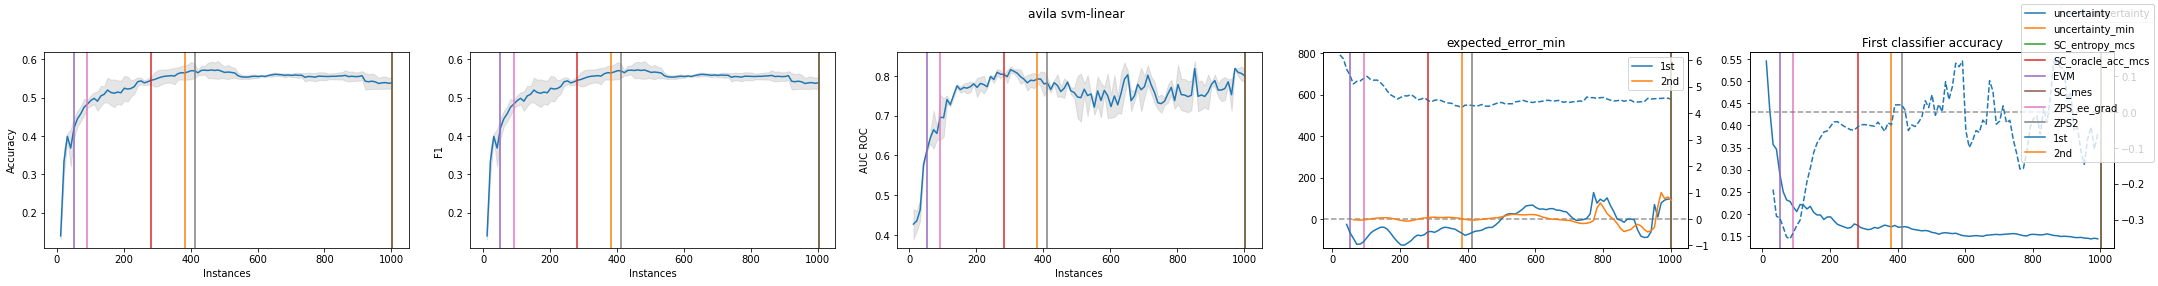

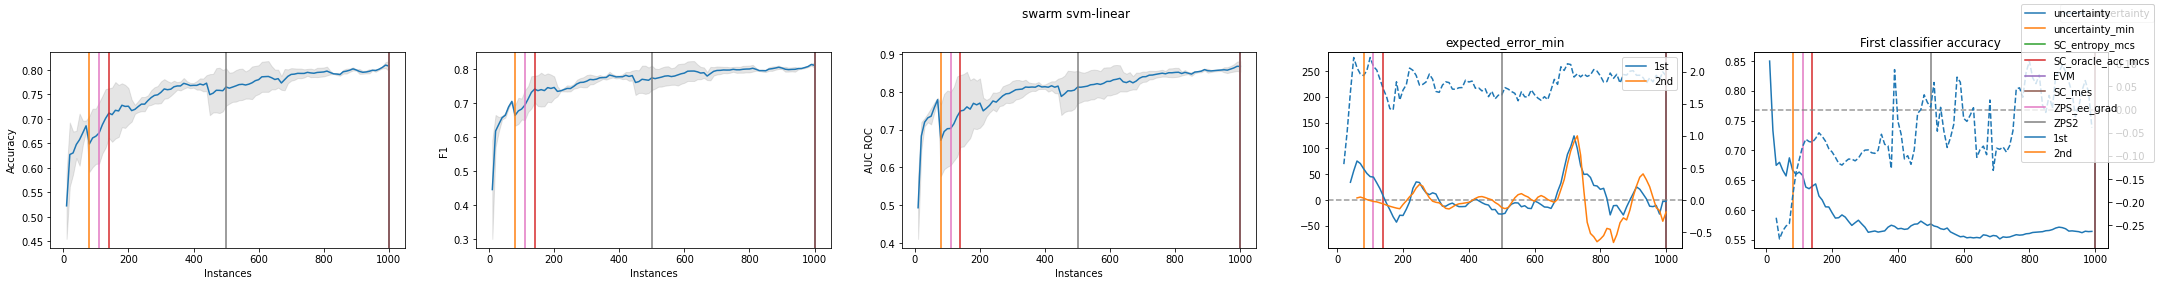

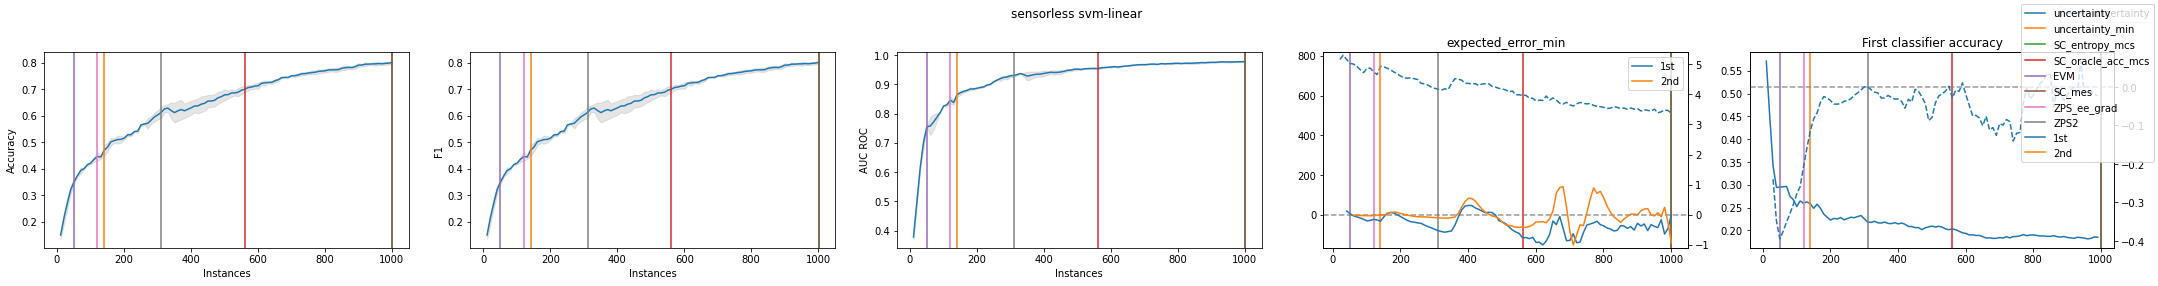

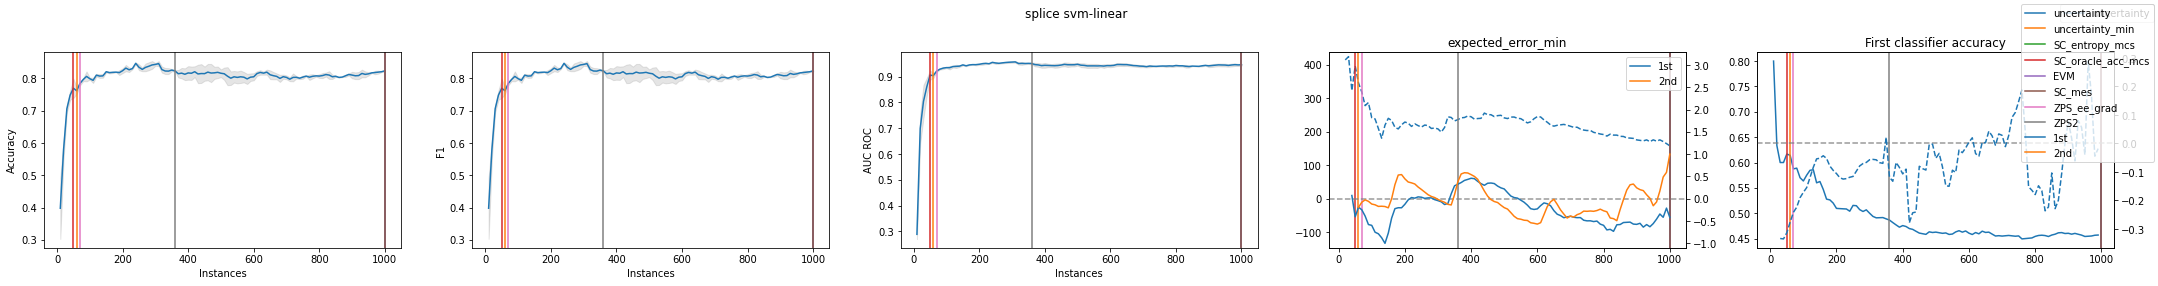

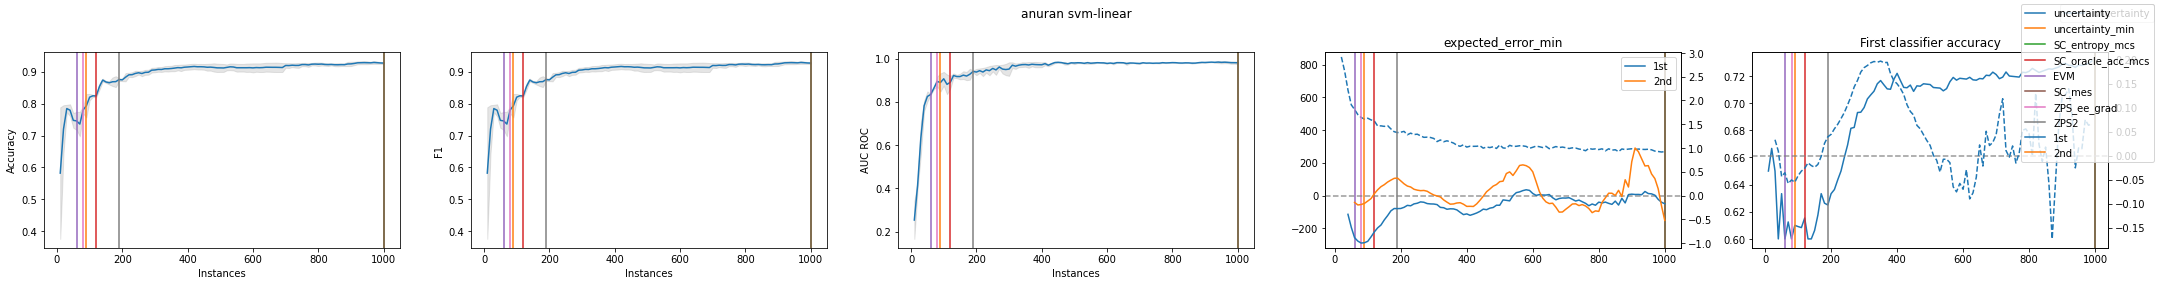

In [38]:
reload(librun)
librun.plot_stop(results_plots, classifiers, stop_conditions, stop_results, figsize=(30, 4))

# Random Forest

In [44]:
matrix = {
    # Dataset fetchers should cache if possible
    # Lambda wrapper required for function to be pickleable (sent to other threads via joblib)
    "datasets": [
        #("newsgroups", wrap(newsgroups, None)),
        ("rcv1", wrap(rcv1, None)),
        ("webkb", wrap(webkb, None)),
        ("spamassassin", wrap(spamassassin, None)),
        ("avila", wrap(avila, None)),
        #("smartphone", wrap(smartphone, None)),
        ("swarm", wrap(swarm, None)),
        ("sensorless", wrap(sensorless, None)),
        ("splice", wrap(splice, None)),
        ("anuran", wrap(anuran, None)),
        
    ],
    "dataset_mutators": {
        "none": (lambda *x, **kwargs: x),
    },
    "methods": [
        ("uncertainty", partial(uncertainty_stop, n_instances=10)),
    ],
    "models": [
        "random-forest"
    ],
    "meta": {
        "dataset_size": 1000,
        "labelled_size": 10,
        "test_size": 0.5,
        "n_runs": 10,
        "ret_classifiers": True,
        "ensure_y": True,
        "stop_info": True,
        "aggregate": False,
        "stop_function": ("len1000", lambda learner: learner.y_training.shape[0] >= 1000),
        "pool_subsample": 1000
    }
}

In [45]:
results = librun.run(matrix, force_cache=True, fragment_run_start=0, fragment_run_end=1)
results_plots = [result[0] for result in results]
classifiers = [result[1] for result in results]
classifiers = [clf for clf in classifiers]

Experiment:   0%|          | 0/8 [00:00<?, ?it/s]

In [46]:
stop_conditions, stop_results = libstop.eval_stopping_conditions(results_plots, classifiers)

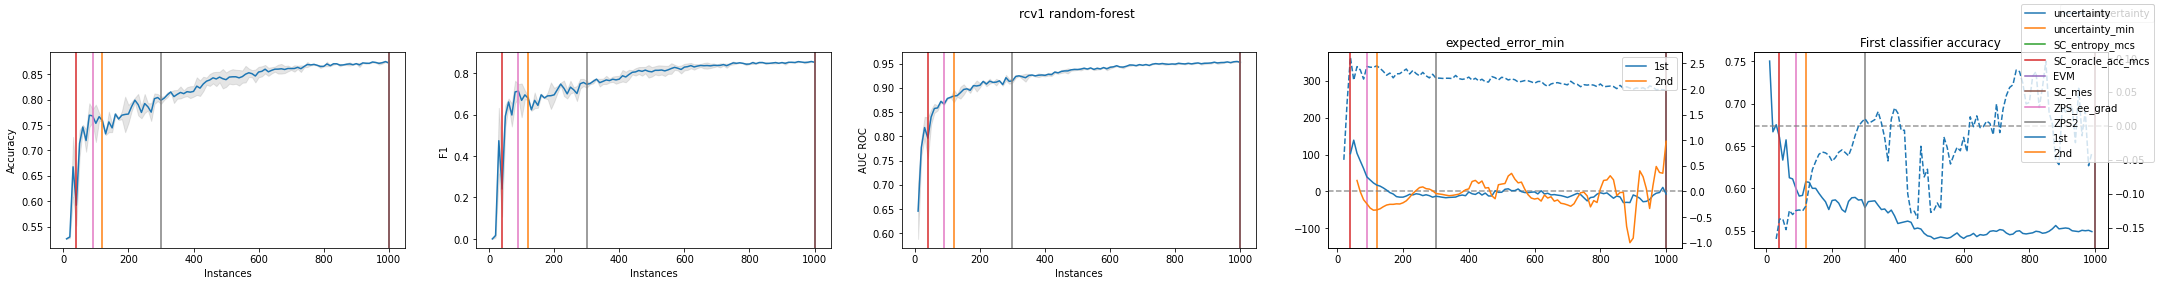

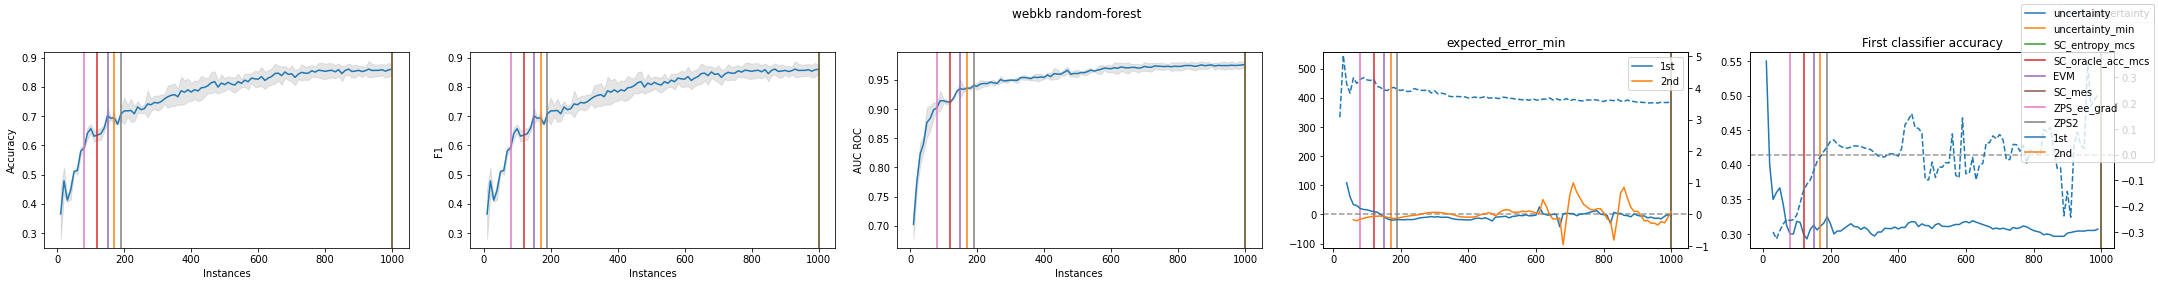

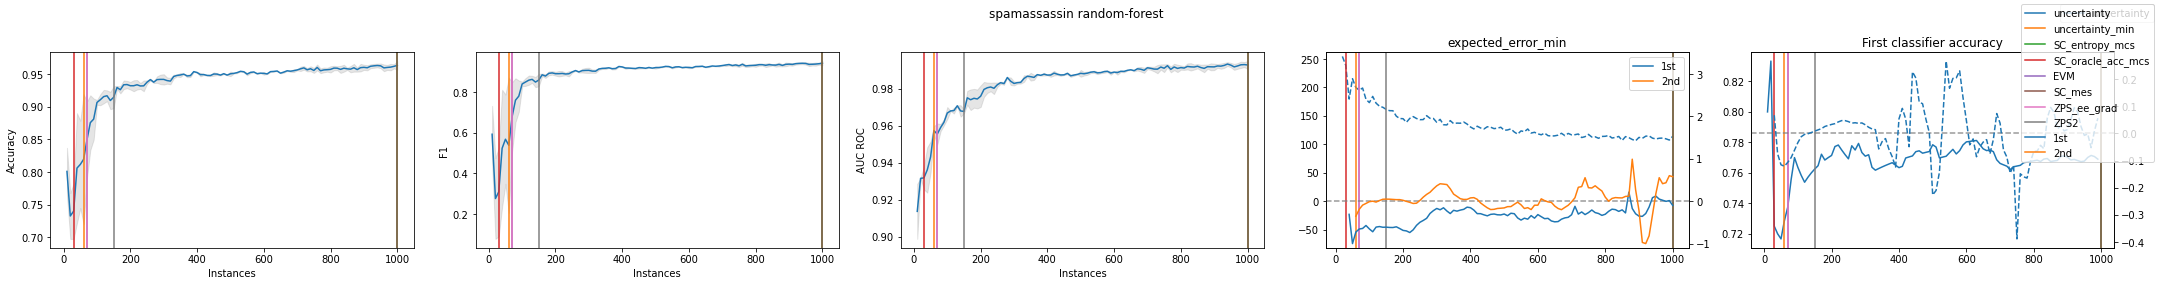

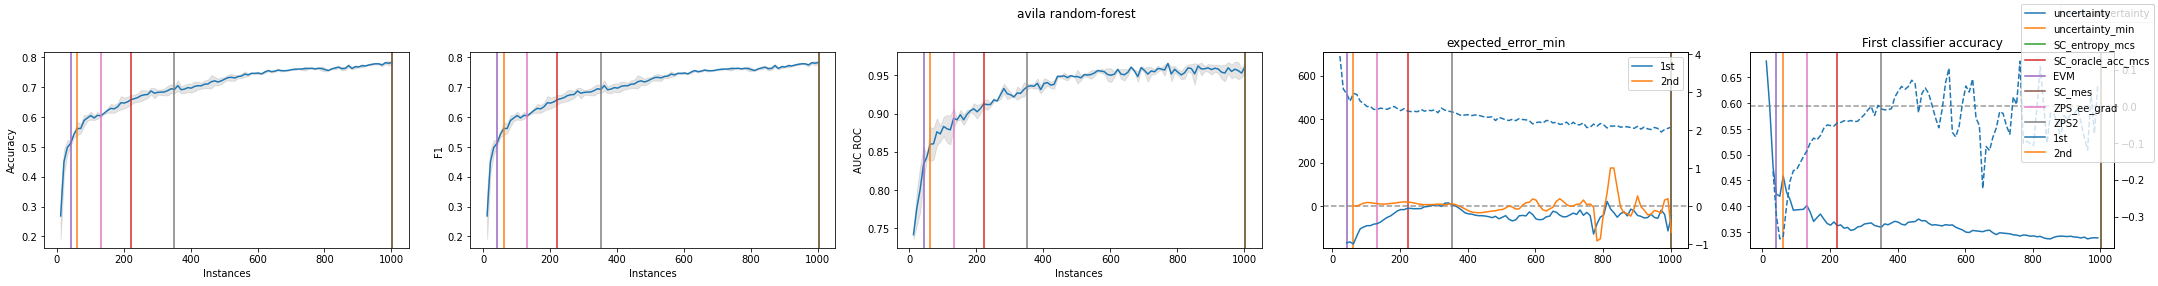

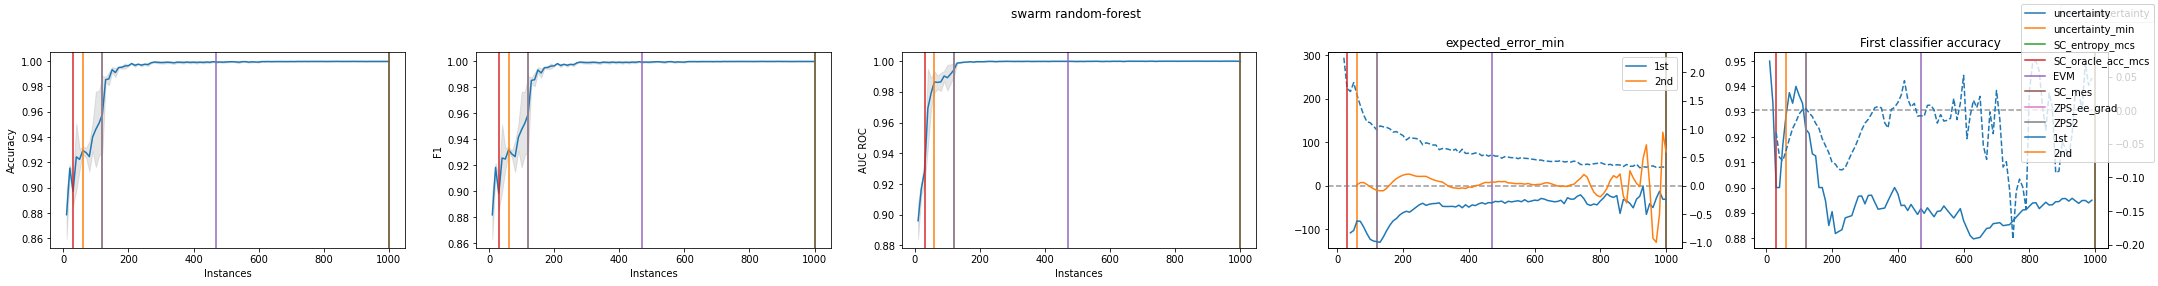

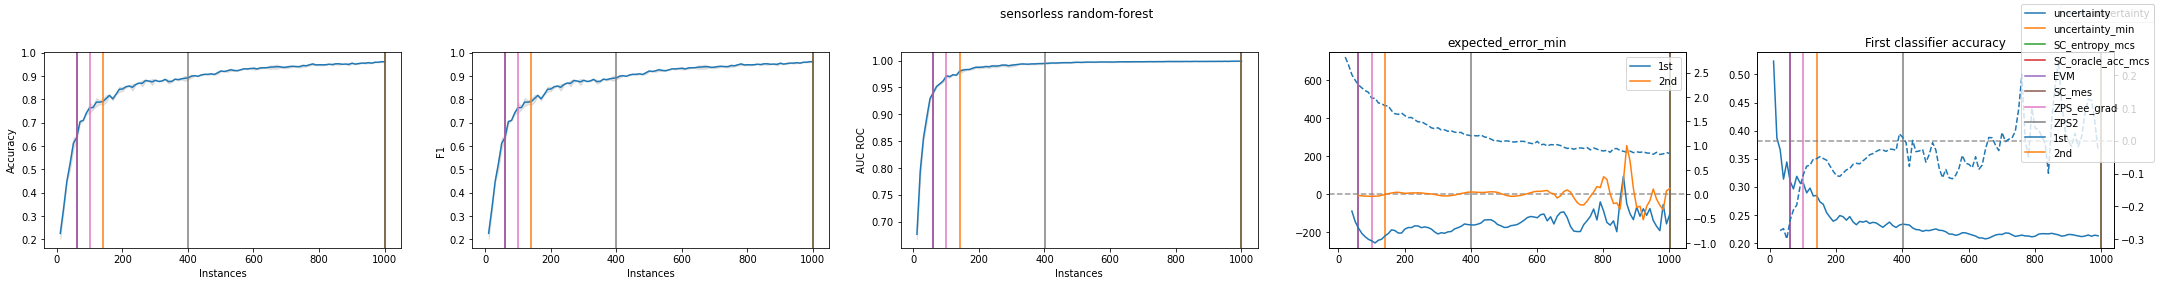

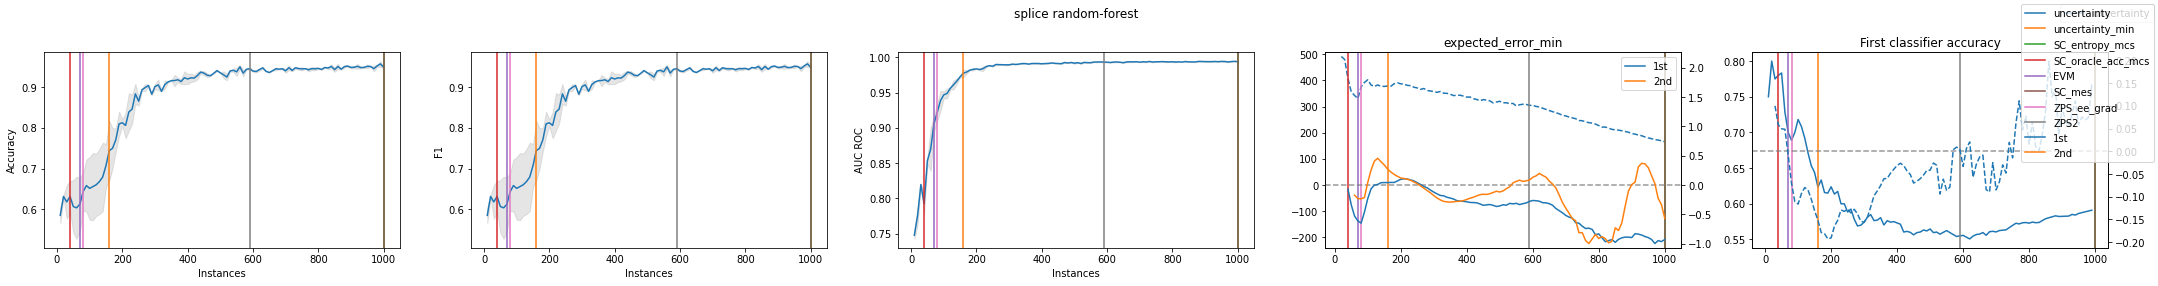

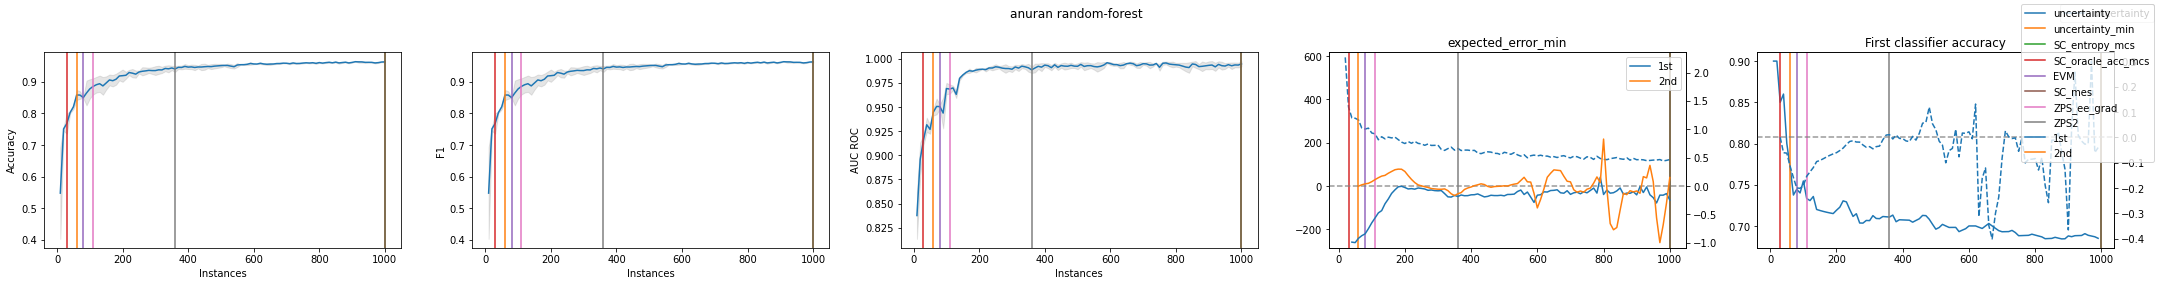

In [47]:
reload(librun)
librun.plot_stop(results_plots, classifiers, stop_conditions, stop_results, figsize=(30, 4))

# Unbalanced

In [2]:
def unbalanced(X_train, X_test, y_train, y_test, amount=1e-1, rand=None, config_str=None, i=None, test_size=None, shuffle=None, **kwargs):
    pass

matrix = {
    # Dataset fetchers should cache if possible
    # Lambda wrapper required for function to be pickleable (sent to other threads via joblib)

    # rcv1, sensorless, anuran are the only datasets to have >3000 instances after being unbalanced
    # maybe a different approach is better? Something non-binary?
    "datasets": [
        ("rcv1", wrap(rcv1, None)),
        ("sensorless", wrap(sensorless, None)),
        ("anuran", wrap(anuran, None)),
    ],
    "dataset_mutators": {
        "unbalanced10": partial(unbalanced, amount=1e-1)
    },
    "methods": [
        ("uncertainty", partial(uncertainty_stop, n_instances=10)),
    ],
    "models": [
        "svm-linear"
    ],
    "meta": {
        "dataset_size": 1000,
        "labelled_size": 10,
        "test_size": 0.5,
        "n_runs": 10,
        "ret_classifiers": True,
        "ensure_y": True,
        "stop_info": True,
        "aggregate": False,
        "stop_function": ("len1000", lambda learner: learner.y_training.shape[0] >= 1000),
        "pool_subsample": 1000
    }
}

In [4]:
results = librun.run(matrix, force_cache=True, fragment_run_start=0, fragment_run_end=1)
results_plots = [result[0] for result in results]
classifiers = [result[1] for result in results]
classifiers = [clf for clf in classifiers]

Experiment:   0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
stop_conditions, stop_results = libstop.eval_stopping_conditions(results_plots, classifiers)

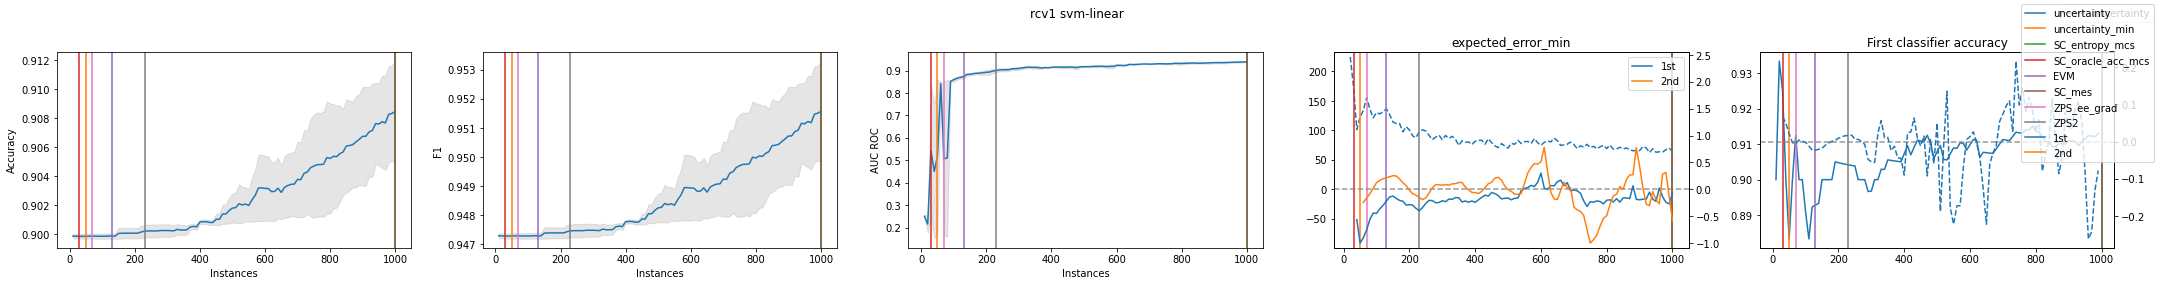

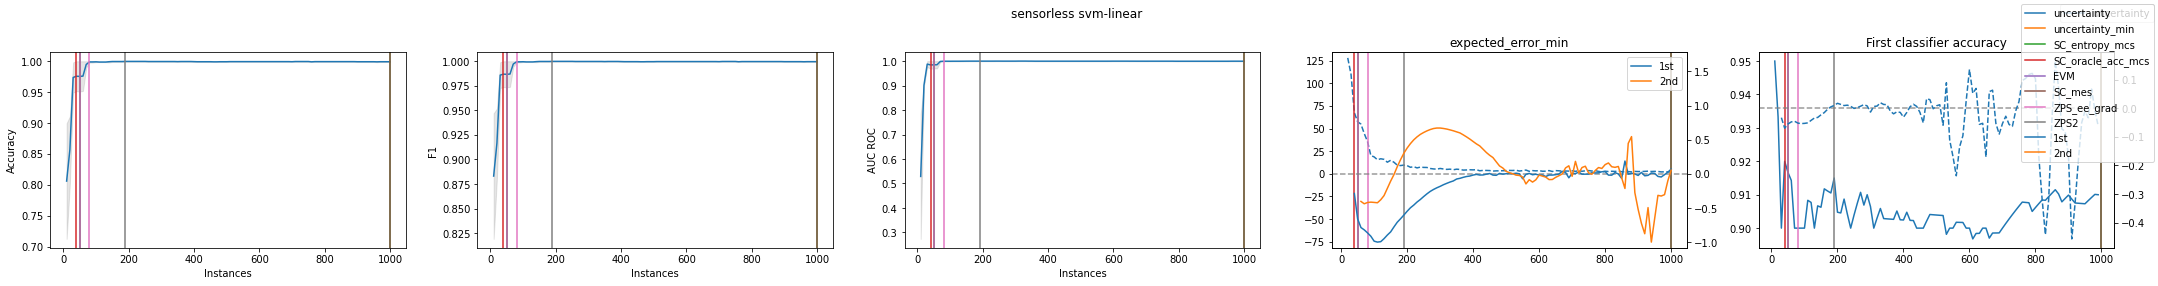

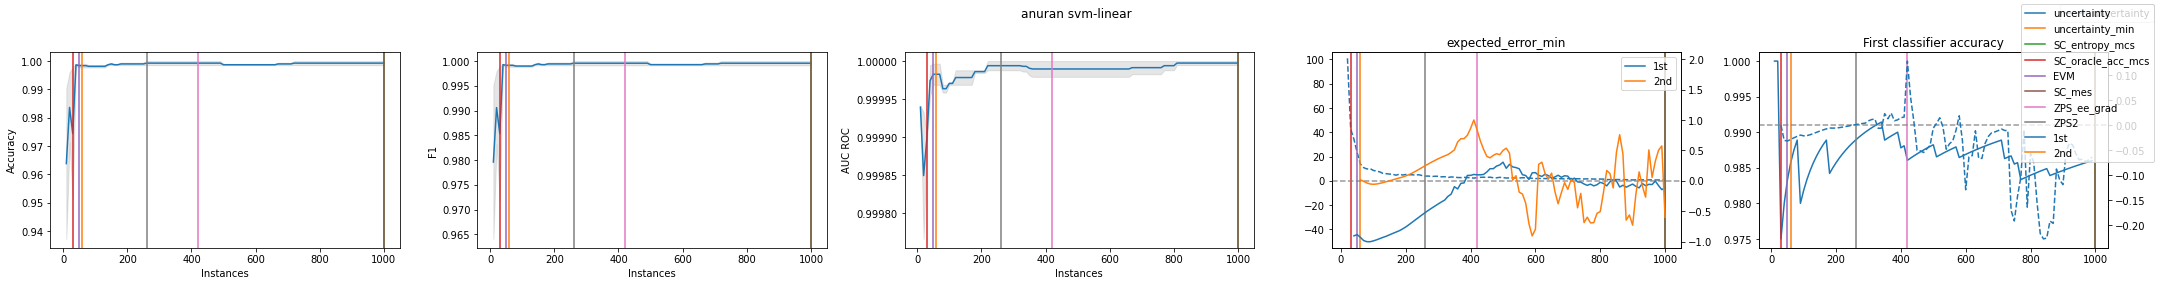

In [6]:
reload(librun)
librun.plot_stop(results_plots, classifiers, stop_conditions, stop_results, figsize=(30, 4))

It seems like making the datasets binary made it too easy to create perfectly accurate classifiers. I don't know if reducing the balance further will really help.